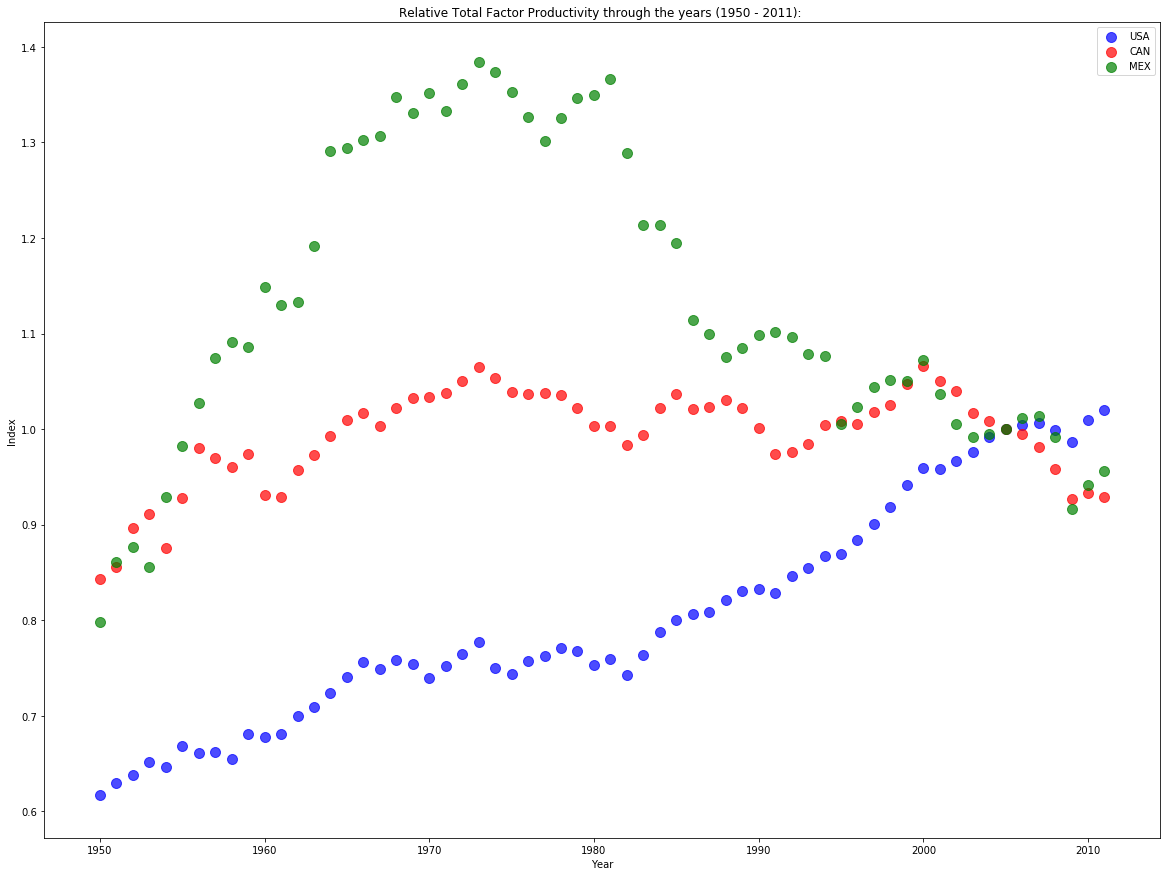

In [24]:
#*-- coding utf8 --*

import matplotlib.pyplot as plt
import csv, seaborn as sb

z = []

with open('src/TFP.csv', 'r') as csvfile:
    plots = list(csv.reader(csvfile, delimiter=','))
    for row in plots[1:]:
        z.append({str(row[0]):(int(row[1]), float(row[2]))})

plt.figure(figsize=(20,15))
plt.title('Relative Total Factor Productivity through the years (1950 - 2011): ')
plt.ylabel('Index')
plt.xlabel('Year')

x,y = zip(*[item.get('USA') for item in z if item.get('USA')])
plt.scatter(x, y, linewidths=1, alpha=.7, edgecolor='b', color = 'b', s = 100)

x,y = zip(*[item.get('CAN') for item in z if item.get('CAN')])
plt.scatter(x, y, linewidths=1, alpha=.7, edgecolor='r', color = 'r', s = 100)

x,y = zip(*[item.get('MEX') for item in z if item.get('MEX')])
plt.scatter(x, y, linewidths=1, alpha=.7, edgecolor='g', color = 'g', s = 100)

labels = ['USA','CAN','MEX']
plt.legend(labels)

plt.show()

#### It would be interesting to bring a lot of new variables described on PWT v8.0/8.1, but there are three that I believe could show the most impactant differences between that set of countries:
* pop: The population of the country (in millions);
* emp: Number of engaged people (in millions);
* The avh: Average annual hours worked by persons engaged.

#### The processing of this data could bring the percentage of each population engaged in each country, comparisons between indexes considering the number of people, the difference (if exists) between the demmand of persons to each country to hit certain productivity level, and other informations.


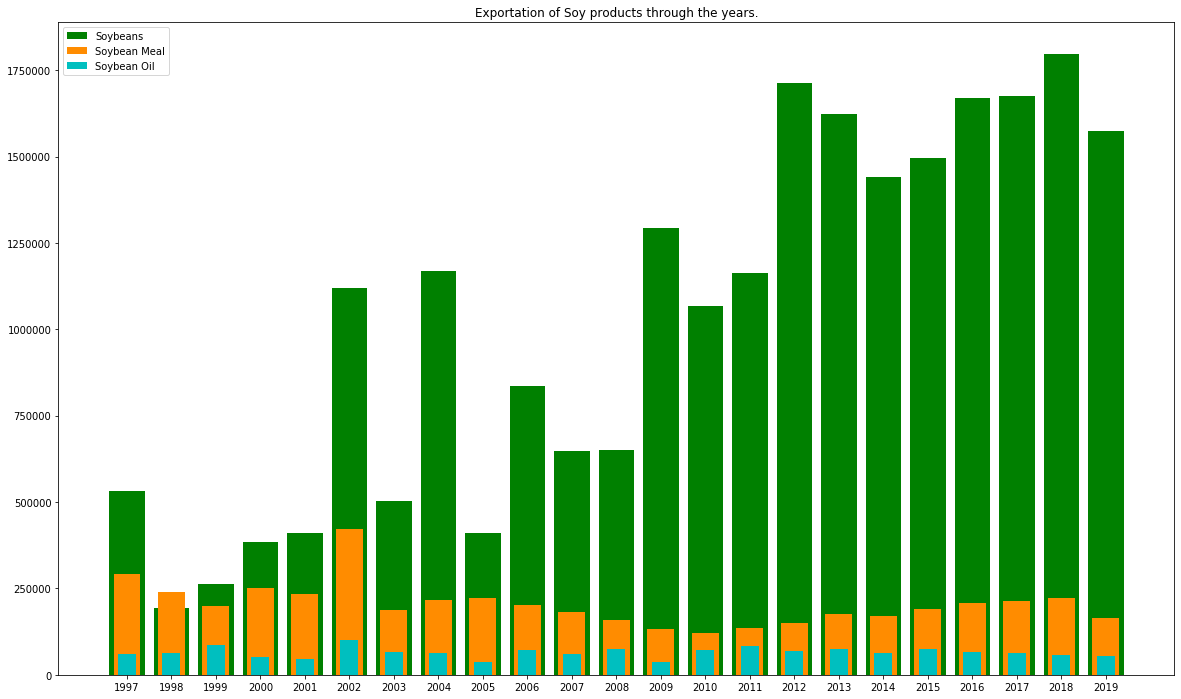

In [59]:
#*-- coding utf8 --*

import matplotlib.pyplot as plt, pandas as pd, csv, datetime, seaborn as sb

z = []

with open('src/data_comexstat.csv', 'r', encoding='latin-1') as csvfile:
    plots = list(csv.reader(csvfile, delimiter=','))
    for row in plots[1:]:
        if row[4] == 'Export':
            z.append({
                str(row[1]):(
                    datetime.datetime.strptime(str(row[0]),'%Y-%m-%d').date().strftime('%Y'), 
                    float(row[6])
                )
            })

plt.figure(figsize=(20,12))

x,y = zip(*[item.get('soybeans') for item in z if item.get('soybeans')])
plt.bar(x, y, 0.80, color='g', label='Soybeans')

x,y = zip(*[item.get('soybean_meal') for item in z if item.get('soybean_meal')])
plt.bar(x, y, 0.60, color='darkorange', label='Soybean Meal')

x,y = zip(*[item.get('soybean_oil') for item in z if item.get('soybean_oil')])
plt.bar(x,y, 0.40, color='c', label='Soybean Oil')

plt.title('Exportation of Soy products through the years.')
plt.legend()


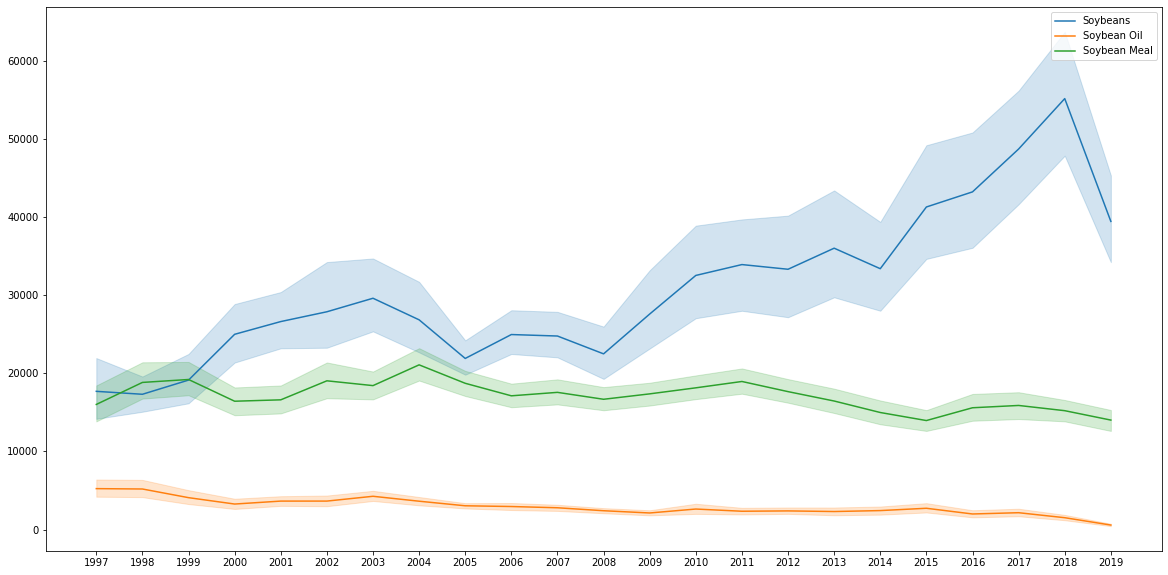

In [62]:
#*-- coding utf8 --*

import matplotlib.pyplot as plt
import csv, seaborn as sb

z = []

with open('src/data_comexstat.csv', 'r', encoding='latin-1') as csvfile:
    plots = list(csv.reader(csvfile, delimiter=','))
    for row in plots[1:]:
        if row[4] == 'Export':
            z.append({
                str(row[1]):(
                    datetime.datetime.strptime(str(row[0]),'%Y-%m-%d').date().strftime('%Y'), 
                    float(row[6])
                )
            })

plt.figure(figsize=(20,10))
plt.title('Exportation of Soy products evolution through the years.')

x,y = zip(*[item.get('soybeans') for item in z if item.get('soybeans')])
#plt.scatter(x, y, linewidths=1, alpha=.7, edgecolor='b', color = 'b', s = 100)
sb.lineplot(x, y)

x,y = zip(*[item.get('soybean_oil') for item in z if item.get('soybean_oil')])
sb.lineplot(x, y)

x,y = zip(*[item.get('soybean_meal') for item in z if item.get('soybean_meal')])
sb.lineplot(x, y)

labels = ['Soybeans', 'Soybean Oil', 'Soybean Meal']
plt.legend(labels)

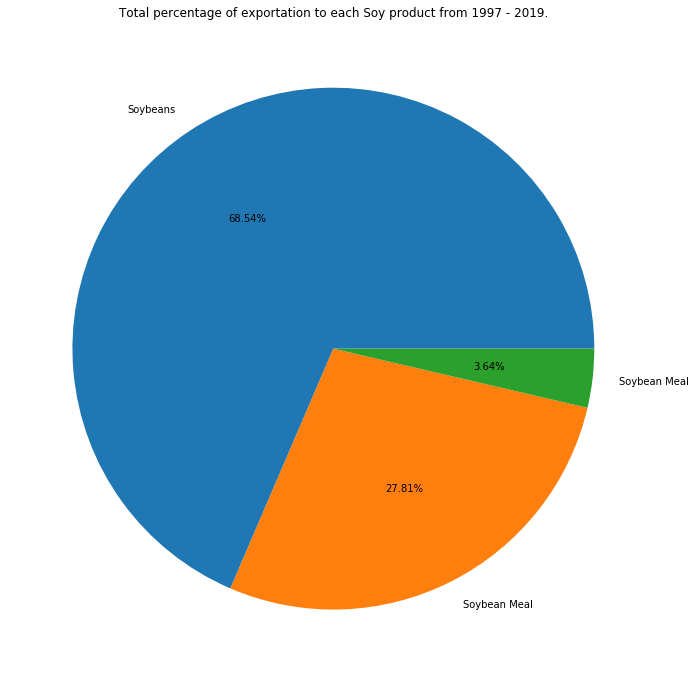

In [50]:
#*-- coding utf8 --*

import matplotlib.pyplot as plt, csv, datetime

z = []

with open('src/data_comexstat.csv', 'r', encoding='latin-1') as csvfile:
    plots = list(csv.reader(csvfile, delimiter=','))
    for row in plots[1:]:
        if row[4] == 'Export':
            z.append({
                str(row[1]):float(row[6])
            })

plt.figure(figsize=(20,12))

beans = [item.get('soybeans') for item in z if item.get('soybeans')]
meal = [item.get('soybean_meal') for item in z if item.get('soybean_meal')]
oil = [item.get('soybean_oil') for item in z if item.get('soybean_oil')]

y = [float(sum(beans)), float(sum(meal)), float(sum(oil))]
labels = ['Soybeans', 'Soybean Meal', 'Soybean Meal']

result = plt.pie(y, labels=labels, autopct='%1.2f%%')

plt.title('Total percentage of exportation to each Soy product from 1997 - 2019.')
plt.show()